<a href="https://www.kaggle.com/code/jiatastic/house-price-prediction-various-ml-models?scriptVersionId=116033605" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Introduction

Thank you for my classmates **Yu Yi** and **Chengyu Hong** working on this project with me. 

We benefit a lot from **@ABHINAVJHANWAR** [https://www.kaggle.com/code/abhinavjhanwar/house-price-prediction-r2-score-94#Looking-at-Outlier](https://www.kaggle.com/code/abhinavjhanwar/house-price-prediction-r2-score-94#Looking-at-Outlier) public notebook, especially his ways on engineering features and removing the outliers. Thank you very much!  

This dataset was used for group project in the intro to dataming class. We tried to implement various machine learning models, including lasso regression, Knn, DecisionTree, random tree and stacking tecnique.

However, one minor change was my professor asked to try binary predictions instead of predicting values. Therefore,my team did some transformations on this dataset, which we set a budget level = 55(in_lacs). If the price properties are above the budget line, it means we cannot afford.

We considered us as property investors, which we didn't know the property price in advance, so we can apply data science approach to predict whether we are capable to bid on this property based on other features provided.

In addition, we create an interactive map of properties using Leaflet package in R. The spatial data was found on Geodatabase at UT Austin online website. The data was based on second-level administrative divisions in 2015. Therefore, there were some minior differences from our dataset; however, it still provide us a comprehensive view of the distribution of properties across India.

### Dataset Transformation

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/house-price-prediction-challenge/train.csv") 

price_list = df["TARGET(PRICE_IN_LACS)"].tolist()
within_budget = []

#Since we are doing classification techniques for this class, we need to convert TARGET(PRICE_IN_LACS) into binary. 
# We take value 1 if TARGET(PRICE_IN_LACS) is below our budget line (It means we are capable to purchase the property) and 0 if TARGET(PRICE_IN_LACS) is above our budget line. 
for value in price_list: 
    if value < 55:
        within_budget.append(1)
    else:
        within_budget.append(0)

df1 = df.copy()
df1["within_budget"] = within_budget
df1 = df1.drop(columns=["TARGET(PRICE_IN_LACS)"])

# Check the new dataset for the project
df1.head(25)


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,within_budget
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,1
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,1
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,0
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,0
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,1
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,0
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,1
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,1
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,1


### Engineering Feature

We noticed that the data in the address column cannot be used for predictions. Therefore, we decided to extract city information out of the address and divide the cities into different tiers. 

Clearly that different tiers of cities have different price range for properties. The one-bedroom apartment around 800 square feets is clearly more expensive than the similar apartment in baffalo. 

In [2]:
df2 = df1.copy()
df2["ADDRESS"] = df1["ADDRESS"].str.split(',').apply(lambda x: x[-1])

# Rename the address column to city
df2.rename(columns={"ADDRESS":"CITY"}, inplace=True) 

# Check Dataframe
df2.head(25) 

def tier_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
             'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
             'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
             'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
             'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
             'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
              'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
              'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
              'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
              'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
              'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
              'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
# Assign Tier to each city in the dataset
df2["Tier_City"] = df2["CITY"].apply(tier_city)

#Switch the position of columns, put dependent variable at the end
df2 = df2.drop(columns = ["within_budget","CITY"])
df2["Within_Budget"] = within_budget

# Check out the new dataset 
df2.head(25)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Tier_City,Within_Budget
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,tier1,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,tier2,1
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,tier1,1
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,tier2,0
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,tier1,0
5,Owner,0,0,3,BHK,1250.000000,1,1,10.033280,76.282571,tier2,1
6,Dealer,0,0,3,BHK,1495.053957,1,1,26.916347,75.795600,tier2,0
7,Owner,0,1,3,BHK,1181.012946,1,1,30.740000,76.650000,tier3,1
8,Dealer,0,1,2,BHK,1040.000000,1,1,13.054202,77.674002,tier1,1
9,Owner,0,1,2,BHK,879.120879,1,1,12.951610,80.140970,tier1,1


### EDA



EDA is an important step in the data science process because it helps to identify the most important variables, visualize the data, and detect any issues that might need to be addressed before building a model.

Some common techniques used in EDA include:

> 1.Visualizing the data using plots such as histograms, scatterplots, and box plots

> 2.Calculating summary statistics such as mean, median, and standard deviation

> 3.Identifying and handling missing or outlier values
Testing for statistical significance using techniques such as t-tests and ANOVA

> 4.Transforming variables to make them more amenable to modeling

> 5.Creating new features by combining or aggregating existing variables.

We would like to check the distribution of some varibles to detect if there are any anomalous properties. 

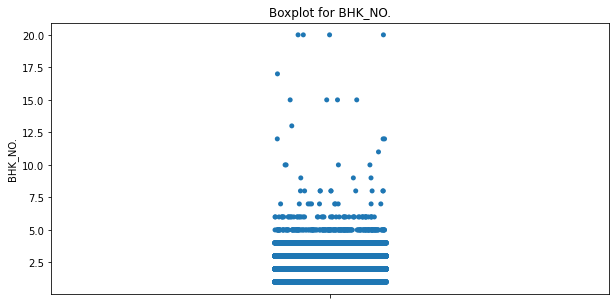

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for No.of BHK_NO.
# Check the Outlier for BHK_NO.
plt.figure(figsize=(10,5))
plt.title("Boxplot for BHK_NO.")
sns.stripplot(y = df2["BHK_NO."], jitter=True, edgecolor="Black")
plt.show()

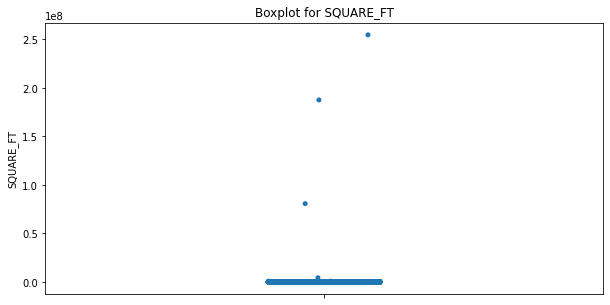

In [4]:
# Check the outlier for SQUARE_FT
plt.figure(figsize=(10,5))
plt.title("Boxplot for SQUARE_FT")
sns.stripplot(y = df2["SQUARE_FT"], jitter=True, edgecolor="Black")
plt.show()

<AxesSubplot:title={'center':'The Distribution of POSTED_BY'}, xlabel='POSTED_BY', ylabel='Count'>

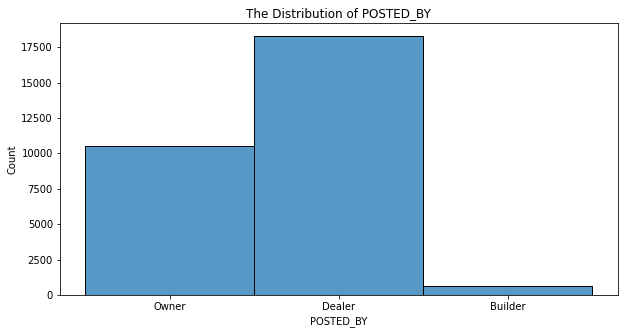

In [5]:
plt.figure(figsize=(10,5))
plt.title("The Distribution of POSTED_BY")
sns.histplot(df2["POSTED_BY"], bins=10)

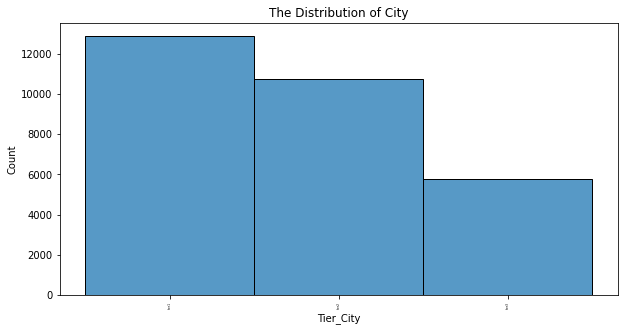

In [6]:
plt.figure(figsize=(10,5))
plt.title("The Distribution of City")
plt.xticks(rotation=90, fontsize=3)
sns.histplot(df2["Tier_City"], bins=5)
plt.show()

### Remove Outliers

We can tell that there are a few outliers in our dataset. Obviously, with the budget line of 55(in_lacs), there is no way we can purchase properties with a large of number of bedrooms or properties with large area. 

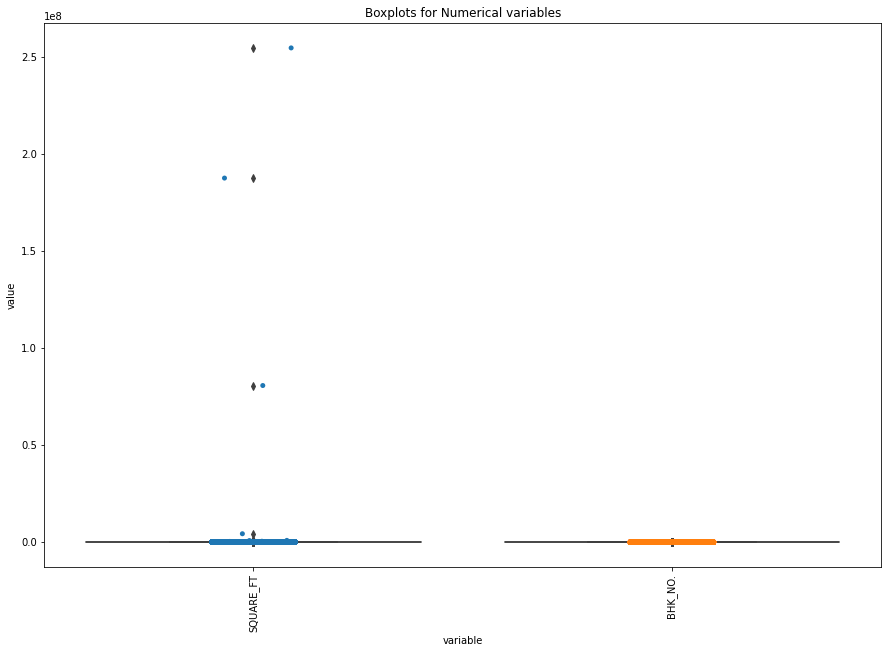

In [7]:
# Look at outliers by boxplots

# Categorical variables 
cvar_list = ['POSTED_BY','BHK_OR_RK','Tier_City']

# Numberical Variables
nvar_list = ['SQUARE_FT','BHK_NO.']

NumericData = df2[nvar_list]
NumericMelt = NumericData.melt()


plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [8]:
# Remove Outliers and display the outlier percentage 
outlier_percentage = {}

for feature in nvar_list:
    tempData = df2.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
    df_sample1= df2[(df2[feature]>Lower_range) & (df2[feature]<Upper_range)].reset_index(drop=True)

print(outlier_percentage)

{'SQUARE_FT': 5.55, 'BHK_NO.': 0.96}


### Data Cleaning

We firstly standardize our dataset and encode categorical variables into dummies. Notice, for the KNN model, there is no need to drop the redundant dummy variable. 

In [9]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

df2[nvar_list] = Scaler.fit_transform(df[nvar_list])

# Encode dummies 
df2[cvar_list] = df2[cvar_list].astype('category')

df2 = pd.get_dummies(df2, prefix_sep='_', drop_first = True)

In [10]:
# Notice we didn't use longtitude and lagtitude information in our models since we already grab enough geographical information from address
df2 = df2.drop(columns=["LONGITUDE","LATITUDE"])

In [11]:
# Check the dataframe
df2.head(25)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,Within_Budget,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,Tier_City_tier2,Tier_City_tier3
0,0,0,-0.446240,-0.009731,1,1,0,0,1,0,0,0
1,0,0,-0.446240,-0.009744,1,1,1,1,0,0,1,0
2,0,0,-0.446240,-0.009924,1,1,1,0,1,0,0,0
3,0,1,-0.446240,-0.009926,1,1,0,0,1,0,1,0
4,1,0,-0.446240,-0.009890,0,1,0,1,0,0,0,0
5,0,0,0.691318,-0.009758,1,1,1,0,1,0,1,0
6,0,0,0.691318,-0.009629,1,1,0,1,0,0,1,0
7,0,1,0.691318,-0.009794,1,1,1,0,1,0,0,1
8,0,1,-0.446240,-0.009868,1,1,1,1,0,0,0,0
9,0,1,-0.446240,-0.009953,1,1,1,0,1,0,0,0


### Decision Tree

We used grid search technique to find the best pruned tree for our dataset. It's a techiqune for hyperparameter tuning that involves specifying a grid of hyperparameter values and training a model for each combination of these values. The best combination of hyperparameters is then chosen based on the performance of the model.

In [12]:
# Since we have included a test set in kaggle dataset, there is no need to run a train_test_split;

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'Within_Budget'
y_train = df2[DV]
X_train = df2.drop(columns=[DV])

In [13]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 5.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=2679b6ebd1ad569dbeb671fcd19be1b3543716cf4927c5f1a01f47979a3293c7
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X_train.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

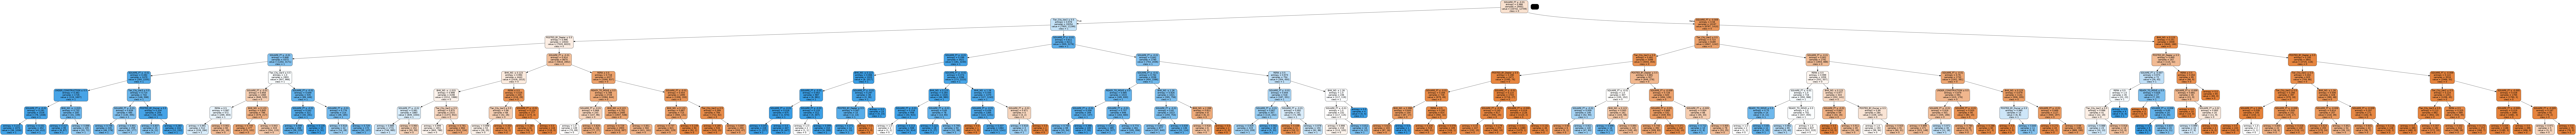

In [15]:
kfolds = 5

# Here we specify within which range of depths we will search for the best pruned tree
maximum_depth = 100
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

# Set n_jobs to be -1 to run  on all CPU cores.
# The search criterion is to find the model that maximizes 
# whatever the scoring function - for this case roc_auc - returns.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X_train,y_train)

# Clf_BPT represents the best pruned tree model 
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))

### Preparing Test Set

For this part, we basically repeat the same process with the trainning set. 

In [16]:
df_test = pd.read_csv("/kaggle/input/house-price-prediction-challenge/train.csv") 

price_list_test = df_test["TARGET(PRICE_IN_LACS)"].tolist()
within_budget_test = []

#Since we are doing classification techniques for this class, we need to convert TARGET(PRICE_IN_LACS) into binary. 
# We take value 1 if TARGET(PRICE_IN_LACS) is below our budget line (It means we are capable to purchase the property) and 0 if TARGET(PRICE_IN_LACS) is above our budget line. 
for value in price_list_test: 
    if value < 55:
        within_budget_test.append(1)
    else:
        within_budget_test.append(0)

df_test1 = df_test.copy()
df_test1["within_budget"] = within_budget_test
df_test1 = df_test1.drop(columns=["TARGET(PRICE_IN_LACS)"])

df_test1["ADDRESS"] = df_test1["ADDRESS"].str.split(',').apply(lambda x: x[-1])
# Rename the address column to city
df_test1.rename(columns={"ADDRESS":"CITY"}, inplace=True) 

df_test1["Tier_City"] = df_test1["CITY"].apply(tier_city)

df_test1 = df_test1.drop(columns = ["within_budget","CITY"])
df_test1["Within_Budget"] = within_budget

df_test1[nvar_list] = Scaler.fit_transform(df[nvar_list])

# Encode dummies 
df_test1[cvar_list] = df_test1[cvar_list].astype('category')

df_test1 = pd.get_dummies(df_test1, prefix_sep='_', drop_first = True)
df_test1 = df_test1.drop(columns=["LONGITUDE","LATITUDE"])

In [17]:
y_test = df_test1[DV]
X_test = df_test1.drop(columns=[DV])

### LogisticRegressionCV

Logistic Regression CV is a version of Logistic Regression that uses cross-validation to find the optimal values for the hyperparameters.

> In Logistic Regression CV, the hyperparameters are optimized using cross-validation, which helps to reduce the risk of overfitting and improve the generalization performance of the model.

> Logistic Regression CV is an efficient method for tuning the hyperparameters of a logistic regression model, and it is often used in practice to obtain the best model. Some of the hyperparameters that can be tuned in logistic regression include the regularization strength, the solver, and the maximum number of iterations.

For this project, we also find the optimal penalty level for the logistic regression model. 

In [23]:
from sklearn.linear_model import LogisticRegressionCV

# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Logistic Regression analysis
def summary_coef(model_object):
  n_predictors = X_train.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X_train.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

In [24]:
# Parameters 
kfolds = 5
min_alpha = 0.1
max_alpha = 100
n_candidates = 1000 

import numpy as np

# Trainning the logistic regression model 
alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))
C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))
clf_optimal = LogisticRegressionCV(Cs=C_list, cv=kfolds, penalty='l1',scoring='roc_auc',solver='saga', max_iter=2000, random_state=1, n_jobs=-1).fit(X_train,y_train)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal))

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(1/clf_optimal.C_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

                           0
UNDER_CONSTRUCTION  0.129022
RERA               -0.529468
BHK_NO.            -1.342836
SQUARE_FT          -0.039509
READY_TO_MOVE      -0.051896
RESALE              0.000000
POSTED_BY_Dealer   -1.460468
POSTED_BY_Owner    -0.308839
BHK_OR_RK_RK        0.000000
Tier_City_tier2     1.647415
Tier_City_tier3     0.431845
Intercept           0.095596
[9.7]


### Random Forest

There are several advantage of Random Forest over decision tree: 

> 1.Random Forest generally performs better than a single decision tree because it reduces overfitting by training a large number of decision trees on different subsets of the data and combining their predictions.

> 2.Because Random Forest is an ensemble method, it is less affected by the noise in the data and is more robust than a single decision tree.

> 3.By training multiple decision trees on different subsets of the data, Random Forest reduces the variance of the model, which makes it less sensitive to the specific training data used and more stable.

> 4.It is easier to tune the hyperparameters of a Random Forest than a single decision tree because the individual decision trees in the ensemble can compensate for the misadjustments of others.

> 5.Random Forest can provide feature importance scores, which can be useful for understanding which features are most important in the data.

However, mentioned by my datamining professor, for business, decision tree model is easier to present. Especially pitching to people who don't have a data science background, a single decision tree can generate rules in plain English. For example, we can present some of the effective rules, such as IF the number of bedroom is greater than 3 and SQTF is over 1200, THEN we can't afford this property. 

In our project, random forest model did outperform a single tree model; however, the improvement is quite limited. Therefore, from a business perspective, it's not worth to abandon english rules to improve only 0.02 auc score. 

In this model, we use Random Search method. Compared to other hyperparameter optimization techniques, such as grid search, Random Search is less computationally expensive and can be a good choice when the search space is large. However, it is also less efficient and may take longer to find the optimal hyperparameters compared to grid search or other methods.

In [25]:
# Packages for RandomForestClassier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Train Random Forest Classier first 
# Pre-specifized parameters
maximum_depth = 100
minimum_depth = 1
param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

# The reason we choose RandomizedSearchCV instead of GridSearchCV because it's faster
# The Random Forest Model
Randomizedsearch = RandomizedSearchCV(RandomForestClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)

# Get the best estimators for Ro
Randomizedsearch.fit(X_train,y_train)
clf_rf = Randomizedsearch.best_estimator_

### KNN

For our Knn model: 

> 1. We used Euclidean distance to measure the distance.
> 2. We used Grid Search to find the best k.



In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Run Nearest neighbor with k-fold cross validation
kfolds = 5
max_k = 200

param_grid = {'n_neighbors': list(range(1, max_k+1))}

# Set n_jobs to be -1 to run on all CPU cores.
# The search criterion is to find the model that maximizes 
# whatever the scoring function - for this case roc_auc - returns.

# We use GridSearch cv instead of gridserchcv here to improve the speed
from sklearn.model_selection import GridSearchCV
GridSearchCV = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
GridSearchCV.fit(X_train,y_train)
clf_knn = GridSearchCV.best_estimator_

### Ensemble Models 

Model stacking is an ensemble learning technique in which a new model is trained to combine the predictions of several base models. The base models can be of any type, such as decision trees, logistic regression, or neural networks.

There are several factors that can contribute to the performance of a stacking model:

> 1.Choice of base models: The base models should be diverse and complementary, meaning they should have different types of error and should not make the same types of mistakes. This can help to improve the overall performance of the stacking model.

> 2.Hyperparameter tuning: It is important to tune the hyperparameters of the base models to optimize their performance. This can be done using techniques such as grid search or random search.

> 3.Choice of meta-model: The meta-model should be chosen based on the type of problem being solved and the characteristics of the base models. For example, if the base models are all decision trees, a linear model might be a good choice for the meta-model.

> 4.Feature engineering: Feature engineering, which involves creating new features from the existing data, can help to improve the performance of the stacking model by providing the base models with more information.

> 5.Cross-validation: Using cross-validation to evaluate the performance of the stacking model can help to ensure that it generalizes well to unseen data.

In [39]:
min_alpha = 0.1
max_alpha = 100
n_candidates = 1000
import numpy as np
alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))
C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))

estimator_list = [
    ('dt',clf_BPT),
    ('rf',clf_rf),
    ('knn_best',clf_knn)
]

# Stack previous models
Stack_Model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegressionCV(Cs=C_list, cv=kfolds, penalty='l1',scoring='roc_auc',solver='saga', max_iter=2000, random_state=1, n_jobs=-1),n_jobs=-1,cv=10)
clf_meta = Stack_Model.fit(X_train,y_train)

### Roc_Auc Score for previous models

Why we should use ROC-AUC to measure the performance of the models: 

> Accuracy is the proportion of correct predictions made by the model, and it can be a useful metric for evaluating the performance of a classifier. However, it is sensitive to class imbalance, which means that it can be misleading when the number of positive and negative examples is not equal. For example, if the negative class is much more prevalent than the positive class, a classifier that always predicts the negative class will have a high accuracy, even though it is not making useful predictions.

> ROC-AUC, on the other hand, is less sensitive to class imbalance and provides a more accurate measure of the model's ability to distinguish between positive and negative classes. It is calculated by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds, and then computing the area under the curve. The TPR is the proportion of positive examples that are correctly classified, while the FPR is the proportion of negative examples that are incorrectly classified as positive.

In [40]:
from sklearn import metrics

print("The ROC-AUC for LogisticRegressionCV is", metrics.roc_auc_score(y_test, clf_optimal.predict_proba(X_test)[:, 1]))

print("The ROC-AUC for Decision Tree is",metrics.roc_auc_score(y_test, clf_BPT.predict_proba(X_test)[:, 1]))

print("The ROC-AUC for Random Forest is",metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:, 1]))

print("The ROC-AUC for KNN is",metrics.roc_auc_score(y_test, clf_knn.predict_proba(X_test)[:, 1]))

print("The ROC-AUC for Meta-Model is",metrics.roc_auc_score(y_test, clf_meta.predict_proba(X_test)[:, 1]))

The ROC-AUC for LogisticRegressionCV is 0.8314582592152039
The ROC-AUC for Decision Tree is 0.8968820135129429
The ROC-AUC for Random Forest is 0.979877513556891
The ROC-AUC for KNN is 0.9075985609487637
The ROC-AUC for Meta-Model is 0.9419687228065442


We noticed that Random Forest has the best performance, even outperforms our ensemble model. 

This may be due to several factors: 

> 1.Lack of diversity: If the base models are not diverse enough, the ensemble model may not be able to make use of their complementary strengths and may perform worse than the best individual base model.

> 2.Poor meta-model: If the meta-model used to combine the predictions of the base models is not well-suited to the problem, it may not be able to effectively combine the predictions of the base models and may perform worse than the individual base models.

> 3.Unbalanced class distribution: If the classes in the data are imbalanced, the ensemble model may not perform as well as the individual base models.